In [53]:

# !pip install seaborn
# #

In [1]:
## confirming file order 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##maybe
# import sklearn.preprocessing import Standard

In [54]:
# sanity check
df = pd.read_csv('aggregate_rating_of_story.csv')


In [56]:
# df.head()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   story                    25 non-null     object 
 1   story_id                 25 non-null     object 
 2   aditya_empathy_human     25 non-null     int64  
 3   aditya_surprise_human    25 non-null     int64  
 4   aditya_engagement_human  25 non-null     int64  
 5   aditya_complexity_human  25 non-null     int64  
 6   aditya_coherence_human   25 non-null     int64  
 7   aditya_fluency_human     25 non-null     int64  
 8   empathy_llama3.1         25 non-null     int64  
 9   surprise_llama3.1        25 non-null     int64  
 10  engagement_llama3.1      25 non-null     int64  
 11  complexity_llama3.1      25 non-null     int64  
 12  coherence_llama3.1       25 non-null     int64  
 13  fluency_llama3.1         25 non-null     int64  
 14  empathy_gpt4o            25 

In [ ]:
reviewers = ['aditya', 'kole', 'dev'] # riz, shravan
llm = ['llama3.1', 'gpt4o']
dimensions = ["empathy", "surprise", "engagement", "complexity", "coherence", "fluency"]

In [8]:
aditya_cols = [col for col in df.columns if col.startswith('aditya_')]
kole_cols = [col for col in df.columns if col.startswith('kole_')]
dev_cols = [col for col in df.columns if col.startswith('dev_')]
llama_cols = [col for col in df.columns if col.endswith('llama3.1')]
gpt4o_cols = [col for col in df.columns if col.endswith('gpt4o')]


In [ ]:
kole_cols

['kole_empathy_human',
 'kole_surprise_human',
 'kole_engagement_human',
 'kole_complexity_human',
 'kole_coherence_human',
 'kole_fluency_human']

In [10]:
def describe_columns(df, columns, label):
    print(f"\n===== {label.upper()} =====")
    print(df[columns].describe().loc[['mean', 'std', 'min', 'max']])


In [11]:
describe_columns(df, aditya_cols, 'Aditya')
describe_columns(df, kole_cols, 'Kole')
describe_columns(df, dev_cols, 'Dev')
describe_columns(df, llama_cols, 'LLaMA 3.1')
describe_columns(df, gpt4o_cols, 'GPT-4o')



===== ADITYA =====
      aditya_empathy_human  aditya_surprise_human  aditya_engagement_human  \
mean              3.000000               3.040000                 2.920000   
std               0.707107               0.888819                 0.996661   
min               2.000000               1.000000                 1.000000   
max               4.000000               4.000000                 5.000000   

      aditya_complexity_human  aditya_coherence_human  aditya_fluency_human  
mean                 3.280000                2.920000              4.080000  
std                  0.678233                0.702377              0.812404  
min                  2.000000                2.000000              2.000000  
max                  4.000000                4.000000              5.000000  

===== KOLE =====
      kole_empathy_human  kole_surprise_human  kole_engagement_human  \
mean             2.80000               2.8400               2.720000   
std              0.57735             

## Empathy

In [13]:
empathy_cols = ['aditya_empathy_human', 'kole_empathy_human', 'dev_empathy_human', 'empathy_llama3.1', 'empathy_gpt4o']
df_empathy = df[empathy_cols]

In [14]:
df_empathy.describe()

,aditya_empathy_human,kole_empathy_human,dev_empathy_human,empathy_llama3.1,empathy_gpt4o
count,25.000000,25.00000,25.000000,25.000000,25.000000
mean,3.000000,2.80000,3.300000,3.960000,4.160000
std,0.707107,0.57735,0.381881,0.454606,0.553775
min,2.000000,2.00000,3.000000,3.000000,3.000000
25%,3.000000,2.00000,3.000000,4.000000,4.000000
50%,3.000000,3.00000,3.000000,4.000000,4.000000
75%,3.000000,3.00000,3.500000,4.000000,4.000000
max,4.000000,4.00000,4.000000,5.000000,5.000000


## rougly 
 particularly GPT-4o (mean 4.16) and Llama3.1 (mean 3.96), generally assigned higher average empathy scores compared to the human evaluators, whose means ranged from 2.8 to 3.3. While human ratings mostly fell between 2 and 4, the AI models' ratings spanned from 3 to 5, indicating they perceived higher levels of empathy overall.

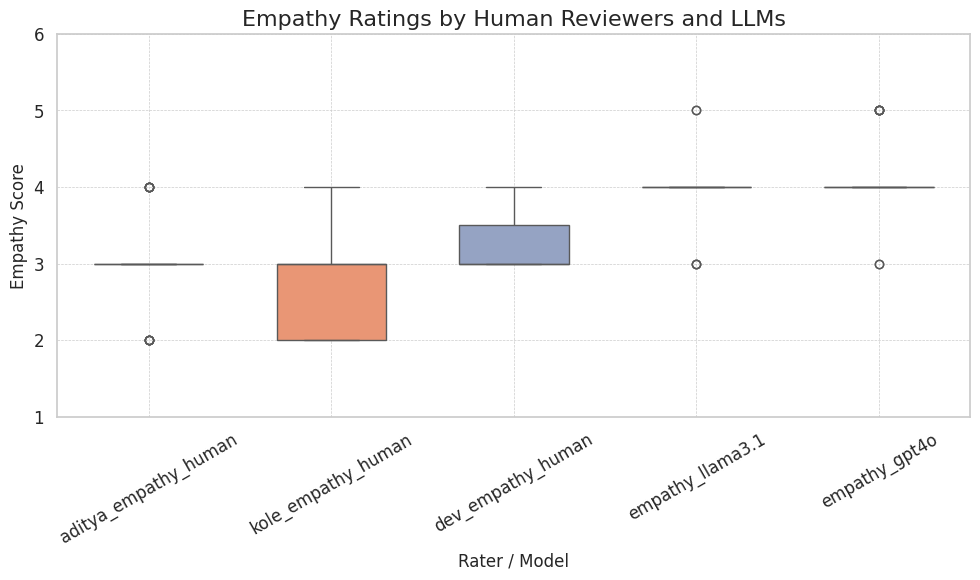

In [63]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.1)

# Create the boxplot using seaborn for better aesthetics
sns.boxplot(data=df_empathy, palette="Set2", width=0.6)

plt.title("Empathy Ratings by Human Reviewers and LLMs", fontsize=16)
plt.ylabel("Empathy Score", fontsize=12)
plt.xlabel("Rater / Model", fontsize=12)
plt.xticks(rotation=30)
plt.ylim(df_empathy.min().min() - 1, df_empathy.max().max()+1)
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

###
> both llama3.1 and gpt40 give consistnenlty 4.0 expect for some outlier
> variance in models individually is low >> sugggests conservative in the empathy rating patterns, also indicate lack of understanding of nuance or overfitting to empathy "prompt template" >> its not good, more exploration should be done

> Humans vary more: Especially in the case of Kole, who uses the lower end of the scale more freely. Also due to higher IQR in kole in lower ranges suggests greater subjectivity or understanding of story context

\
### TODO
add bad samples of story in the data and see the effect, like cutting some parts .

In [16]:
df_empathy.corr()


,aditya_empathy_human,kole_empathy_human,dev_empathy_human,empathy_llama3.1,empathy_gpt4o
aditya_empathy_human,1.000000,0.408248,0.154303,0.129619,0.319221
kole_empathy_human,0.408248,1.000000,0.377964,-0.031750,-0.026064
dev_empathy_human,0.154303,0.377964,1.000000,0.192006,-0.039406
empathy_llama3.1,0.129619,-0.031750,0.192006,1.000000,0.523007
empathy_gpt4o,0.319221,-0.026064,-0.039406,0.523007,1.000000


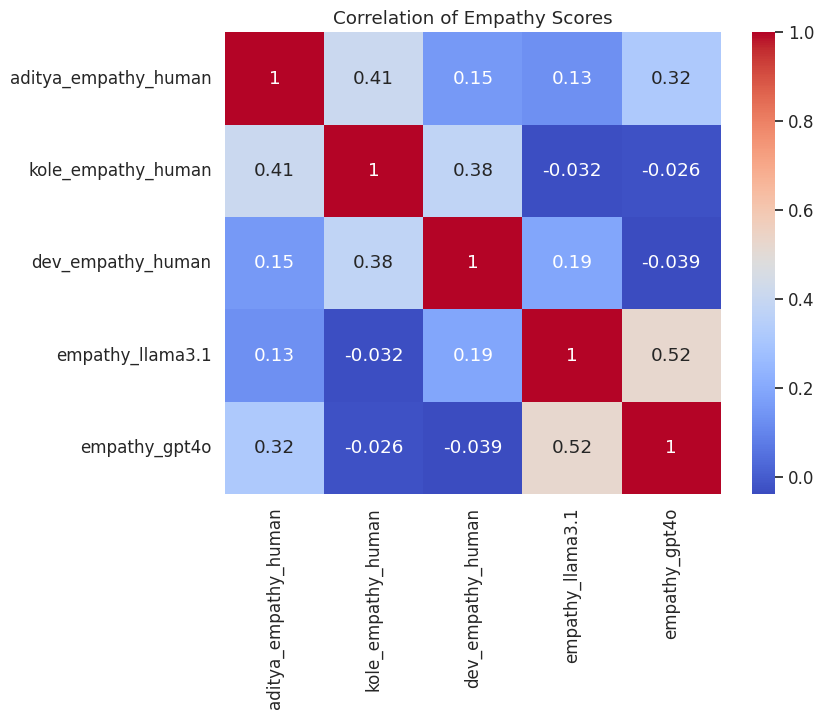

In [66]:


plt.figure(figsize=(8, 6))
sns.heatmap(df_empathy.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Empathy Scores")
plt.show()


## the highest conformal value is 0.52, atleast model are agreeing with eachother, but from gpt4o paper, llms do score better its own result for summarization task.


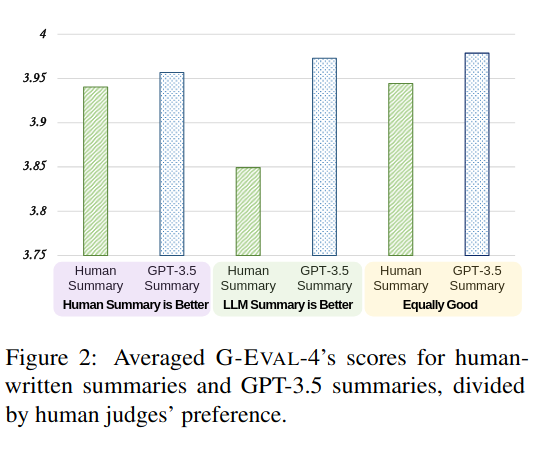


#### bias towards the LLM- generated summaries because the model could share the same concept of evaluation criteria during generation and evaluation (from Geval). 

In [76]:
print(df_empathy.columns)

Index(['aditya_empathy_human', 'kole_empathy_human', 'dev_empathy_human',
       'empathy_llama3.1', 'empathy_gpt4o'],
      dtype='object')


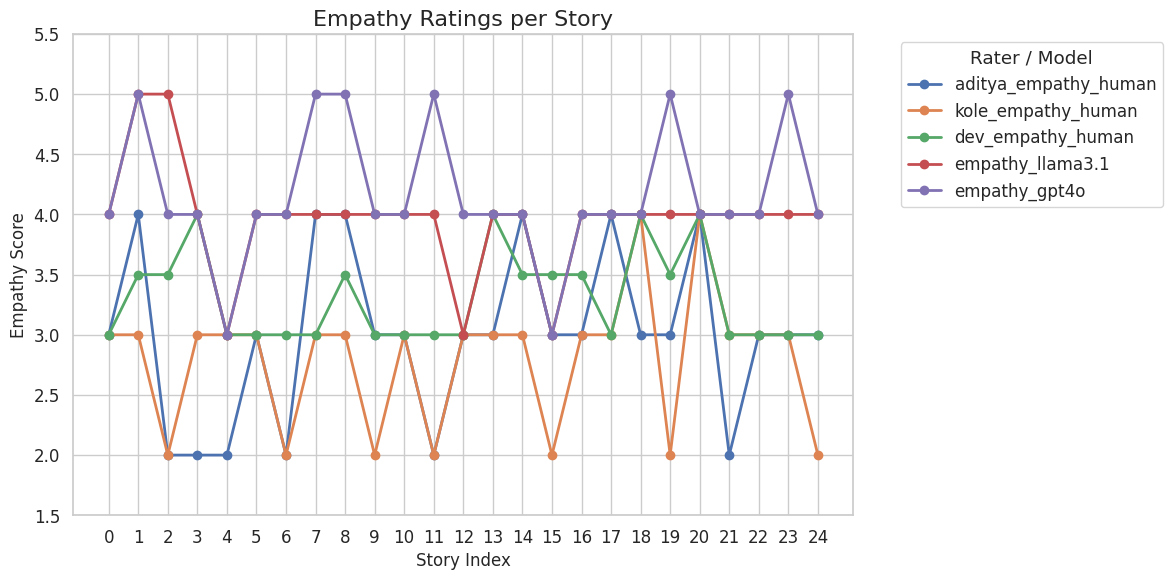

In [80]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", font_scale=1.1)

# Plot all empathy columns for each rater/model
for col in df_empathy.columns[:]:
    plt.plot(df_empathy.index, df_empathy[col], marker='o', label=col, linewidth=2)

plt.title("Empathy Ratings per Story", fontsize=16)
plt.xlabel("Story Index", fontsize=12)
plt.ylabel("Empathy Score", fontsize=12)
plt.xticks(df_empathy.index)
plt.ylim(df_empathy.min().min() - 0.5, df_empathy.max().max() + 0.5)
plt.legend(title="Rater / Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### one thing can be seen here is bias or maybe limited understandingg of an reviewer , as there behaviour of rating is limited within a range of 3-4, 3-2. Also, from gpteval4 suggest additional prompting strategy eg. CoT can provide more context and guidance for the LLM to evaluate the generated text, and can also help to explain the evaluation process and results.

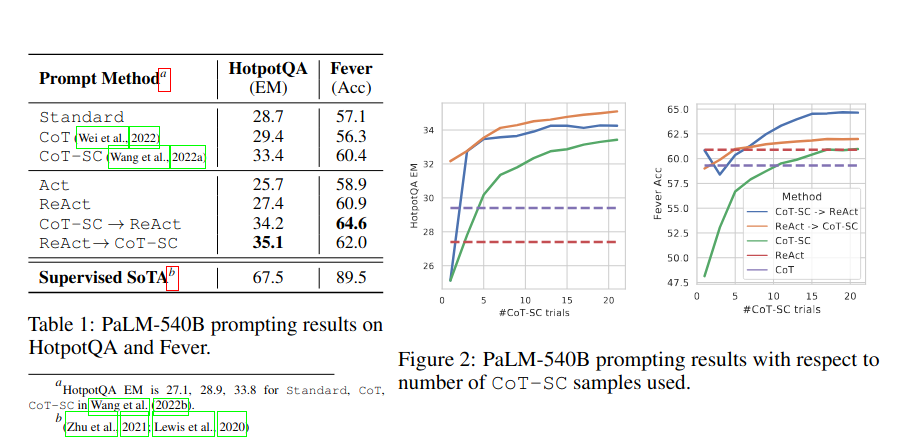


### Reference:
ReAct: Synergizing Reasoning and Acting in Language Models}, 
      author={Shunyu Yao and Jeffrey Zhao and Dian Yu and Nan Du and Izhak Shafran and Karthik Narasimhan and Yuan Cao},
      year={2023},

# all dims

In [82]:


for dim in dimensions:
    cols = [
        f'aditya_{dim}_human',
        f'kole_{dim}_human',
        f'dev_{dim}_human',
        f'{dim}_llama3.1',
        f'{dim}_gpt4o'
    ]
    
    corr_matrix = df[cols].corr()
    print(f"\n=== Correlation Matrix for {dim.upper()} ===")
    print(corr_matrix.round(2))



=== Correlation Matrix for EMPATHY ===
                      aditya_empathy_human  kole_empathy_human  \
aditya_empathy_human                  1.00                0.41   
kole_empathy_human                    0.41                1.00   
dev_empathy_human                     0.15                0.38   
empathy_llama3.1                      0.13               -0.03   
empathy_gpt4o                         0.32               -0.03   

                      dev_empathy_human  empathy_llama3.1  empathy_gpt4o  
aditya_empathy_human               0.15              0.13           0.32  
kole_empathy_human                 0.38             -0.03          -0.03  
dev_empathy_human                  1.00              0.19          -0.04  
empathy_llama3.1                   0.19              1.00           0.52  
empathy_gpt4o                     -0.04              0.52           1.00  

=== Correlation Matrix for SURPRISE ===
                       aditya_surprise_human  kole_surprise_human  \
adi

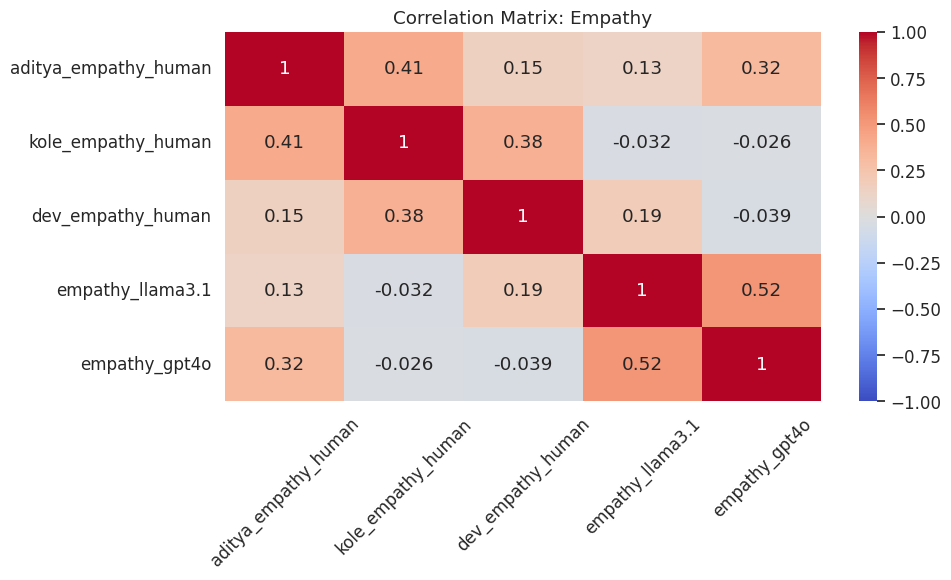

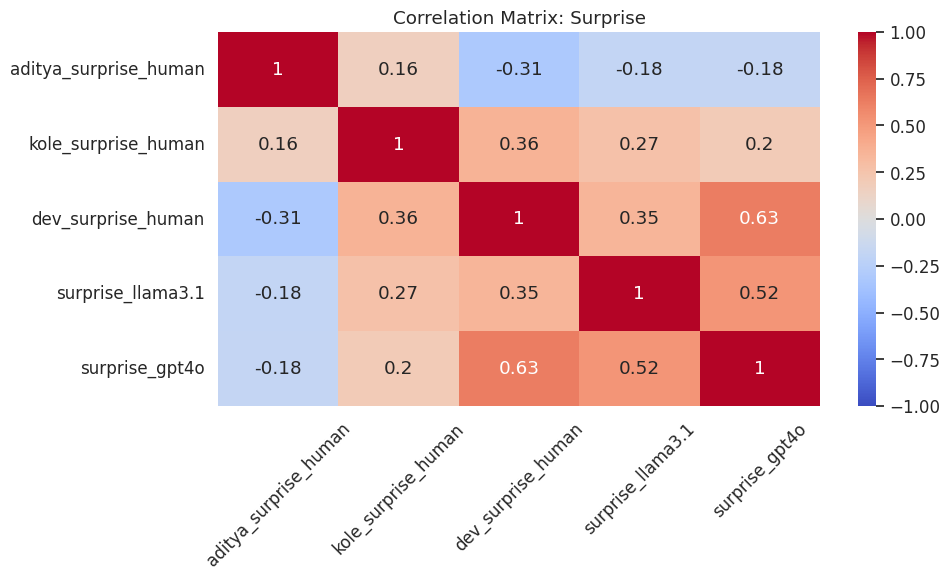

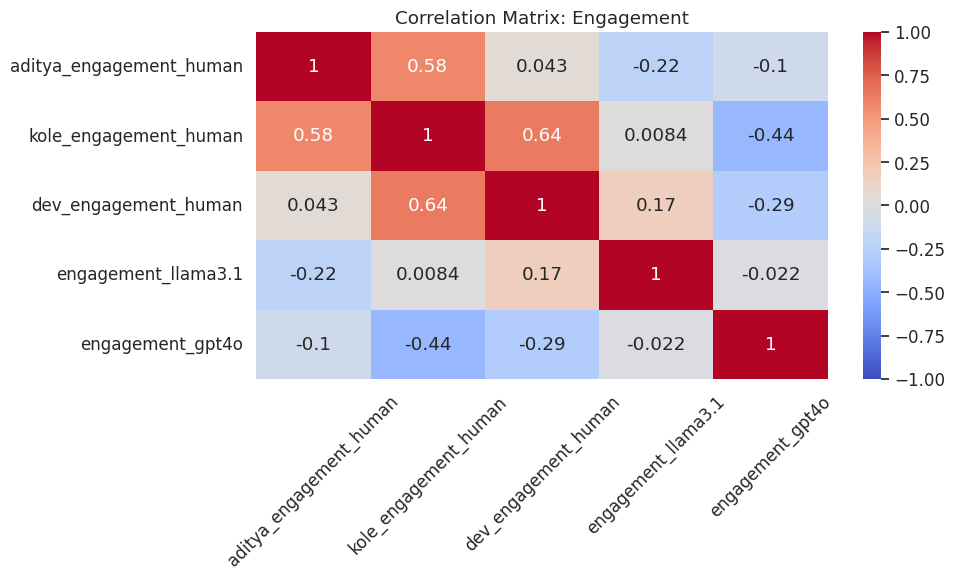

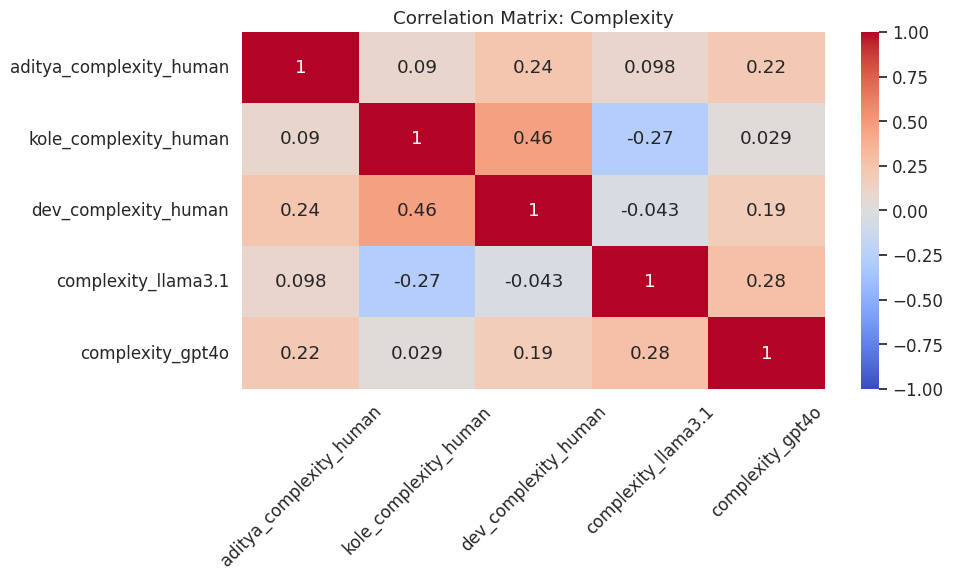

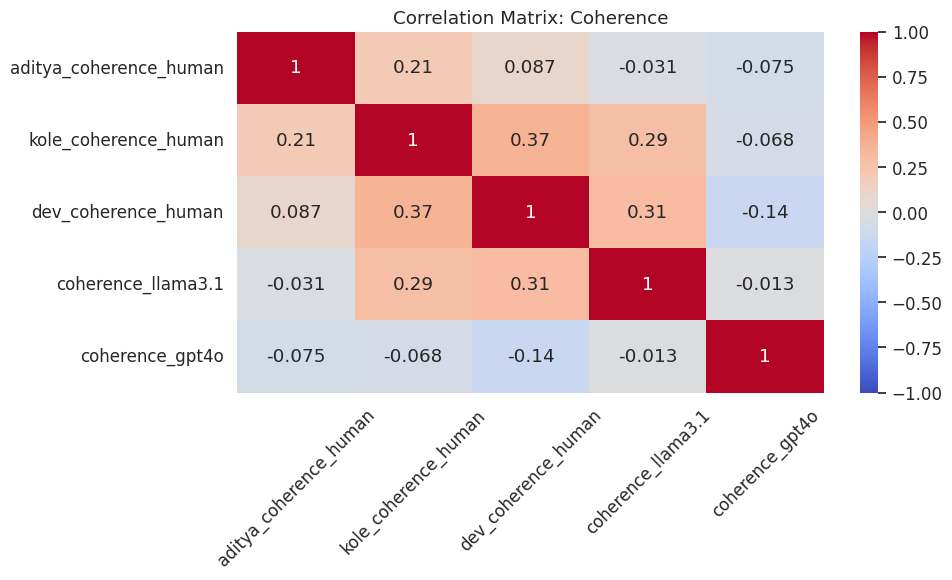

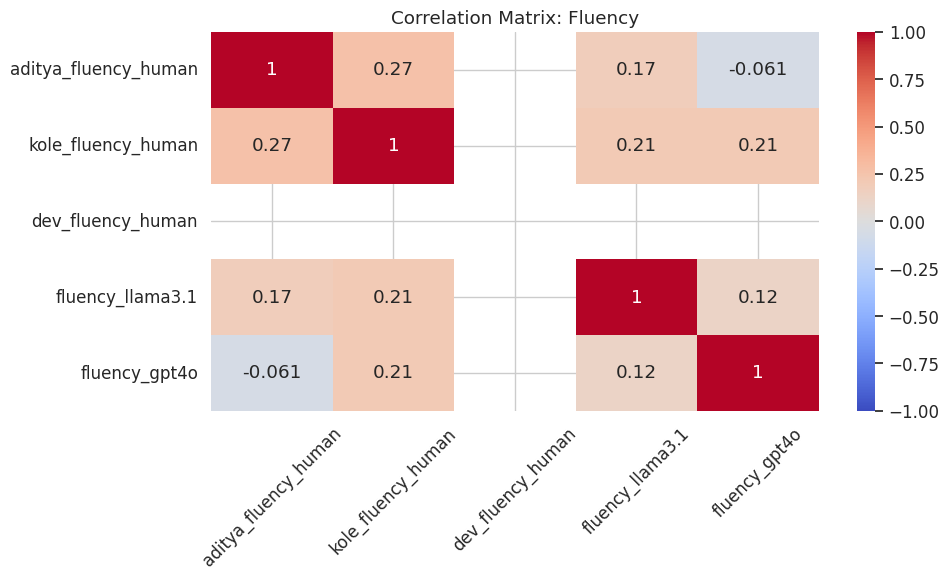

In [89]:

for dim in dimensions:
    cols = [
        f'aditya_{dim}_human',
        f'kole_{dim}_human',
        f'dev_{dim}_human',
        f'{dim}_llama3.1',
        f'{dim}_gpt4o'
    ]

    # corr_matrix = df[cols].corr()
    # print(f"\n=== Correlation Matrix for {dim.upper()} ===")
    # print(corr_matrix.round(2))
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix: {dim.capitalize()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### to conclude based on correlation


##### b/w human

1. It's quite interesting to see how the agreement varies. Among the human evaluators (Aditya, Kole, and Dev), their level of agreement changes quite a bit depending on what they're rating. For instance, Kole and Dev showed strong positive agreement on Engagement (0.64), meaning they often rated engagement similarly. Aditya and Kole also had a decent alignment on Engagement (0.58). 

2.  However, for other metrics like Complexity, the agreement between Aditya and Kole was almost non-existent (0.09), and for Surprise, Aditya and Dev actually had a moderate negative correlation (-0.31), suggesting they had opposing views on what constituted surprise. So, human consensus isn't always a given and can be quite metric-specific.

##### b/w models

1. moderate agreement on Empathy (0.52) and Surprise (0.52), indicating they might have somewhat similar internal "understandings" of these concepts. 

2. However, their agreement dropped significantly for other metrics. For Engagement (-0.02) and Coherence (-0.01), there was virtually no correlation, meaning their ratings for these qualities were largely independent of each other. For Complexity (0.28) and Fluency (0.12), their agreement was only weak. This divergence, especially on Engagement and Coherence, is quite notable.

##### b/w model and human


1. correlations are generally weak to moderate, with some interesting peaks and valleys. There isn't one model that consistently agrees more with all humans across all metrics. 

2. For Empathy, GPT-4o had a moderate correlation with Aditya (0.32), but both AIs showed negligible or very weak negative correlations with Kole and Dev. Surprise had a standout: Dev's ratings correlated strongly with GPT-4o (0.63) and moderately with Llama3.1 (0.35). This was the highest human-AI agreement observed. Conversely, Aditya's surprise ratings had a weak negative correlation with both AIs. Engagement ratings from the AIs generally didn't align well with human ratings, often showing weak or even moderate negative correlations (e.g., Kole and GPT-4o at -0.44). For Complexity and Coherence, most human-AI correlations were weak or negligible, though Dev and Llama3.1 showed moderate agreement on Coherence (0.31). 



##### some personal comments 
1. author has already presummed reviewers are not good, thats why focussed on heuristics approach , which will replace requirement of reviewer
1.1 reviewre rating can be improved if the language of stories is more human readable rather than jibberish , currently it uses more evocative and figurative language (e.g., *"memories burst forth like wisps of steam,"* *"Time had thinned him down, like autumn leaves"*). It's more overtly "literary" in its descriptions of internal states.
2. but interesting part here is even models are not agreeing wiht each other on metrics like Coherecne (-0.01).  

In [ ]:
import textwrap
story_text = df.story[10]


wrapped_story = textwrap.fill(story_text, width=70)

print(wrapped_story)

Henry trudged through the dense forest, his worn boots crunching on
dry leaves. A gust of wind whipped his cap askew, and he pushed it
back into place with a gnarled hand. "Afternoon to me, then," he said
aloud, though there was no one to answer. Years ago, he'd left the
village for these woods, searching for peace from life's trials. Time
had thinned him down, like autumn leaves. His mind wandered, memories
stirring as they often did in solitude – memories of lost love,
cherished friends now dust and ash.  As Lila stepped through the
ancient circle, she felt memories burst forth like wisps of steam on a
winter's morn. Whispered secrets of past love and war echoed off the
stone surfaces, tempting her to stay and savor each forgotten moment.
But the rogue officer from town had followed, his gruff face creasing
with suspicion. "Lila Thompson, what've you got cooking in that
troubled head o' yours?" He spotted the glowing stones and crossed
arms over his chest. "Don't tell me, don't tell 

## Bite-sized: 50 great short stories, chosen by Hilary Mantel, George Saunders and more
https://www.theguardian.com/books/2019/feb/02/bite-sized-leading-authors-recommend-50-great-short-stories


## Key Differences Between story generated through present setup of illumulus 2024 and great short stories rated by humans

### 1. Narrative Structure & Cohesion

- **Paragraph 1**: Fragmented. It reads like three separate story ideas or opening scenes, each with a different protagonist and situation. There's no clear narrative thread connecting Henry, Lila, and Tom.
- **Paragraph 2**: Cohesive and linear. It follows one character, Arnold, through a sequence of events related to a single, central incident.

### 2. Focus & Point of View

- **Paragraph 1**: Shifts focus between multiple characters (Henry, Lila, Tom) and their internal states (memories, feelings, identity crises). The point of view changes with each segment.
- **Paragraph 2**: Maintains a tight focus on Arnold's experience and perspective. We see and hear the world largely through his senses and understand events through his limited, child's-eye view.

### 3. Plot Development

- **Paragraph 1**: Introduces situations and characters but doesn't develop a singular plot. Each segment hints at a potential story but doesn't progress far.
- **Paragraph 2**: Has a clear, unfolding plot centered on the aftermath of a tragic event. There's a distinct progression from hiding, to being discovered, to facing the authorities.

### 4. Tone & Atmosphere

- **Paragraph 1**: Varies with each segment – from melancholic and reflective (Henry), to mysterious and tense (Lila), to grieving and eerie (Tom).
- **Paragraph 2**: Maintains a consistent tone of apprehension, somberness, and underlying dread throughout. The atmosphere is heavy and realistic.

### 5. Style & Language

- **Paragraph 1**: Uses more evocative and figurative language (e.g., *"memories burst forth like wisps of steam,"* *"Time had thinned him down, like autumn leaves"*). It's more overtly "literary" in its descriptions of internal states.
- **Paragraph 2**: Employs a more direct, observational, and realistic style. The descriptions are grounded in sensory details and actions, reflecting Arnold's immediate experience.

### 6. Themes

- **Paragraph 1**: Touches on themes of solitude, memory, loss, identity, the past, and perhaps a hint of the supernatural or magical.
- **Paragraph 2**: Deals with themes of grief, guilt, childhood trauma, family crisis, facing consequences, and the stark realities of death and official procedures.


## maybe avg. works here (normally it should , but here all reviweres underscore the stories)

In [95]:
df['avg_human_empathy'] = df[[f'{r}_empathy_human' for r in ['aditya', 'kole', 'dev']]].mean(axis=1)

In [96]:
df.head()

,story,story_id,aditya_empathy_human,aditya_surprise_human,aditya_engagement_human,aditya_complexity_human,aditya_coherence_human,aditya_fluency_human,empathy_llama3.1,surprise_llama3.1,...,kole_complexity_human,kole_coherence_human,kole_fluency_human,dev_empathy_human,dev_surprise_human,dev_engagement_human,dev_complexity_human,dev_coherence_human,dev_fluency_human,avg_human_empathy
0,"Noah, a self-proclaimed 'king of the playgroun...",Story_1,3,1,3,4,3,4,4,5,...,4,3,4,3.0,3.5,3.5,4.0,3.0,4,3.000000
1,Henry's eyes gazed out the window as the sound...,Story_2,4,3,2,3,4,4,5,4,...,3,3,4,3.5,3.5,4.0,3.5,4.0,4,3.500000
2,Granny Clara Jenkins adjusted her shades and w...,Story_3,2,3,2,3,3,4,5,4,...,3,3,4,3.5,3.0,4.0,3.0,3.5,4,2.500000
3,Henry puffed on his pipe as he sat behind the ...,Story_4,2,3,4,2,3,5,4,5,...,3,4,4,4.0,3.5,4.0,3.0,4.0,4,3.000000
4,The lights of Manhattan's concrete jungle cast...,Story_5,2,4,2,3,3,4,3,5,...,3,3,4,3.0,4.0,3.5,3.5,3.0,4,2.666667


In [97]:
df[['avg_human_empathy', 'empathy_llama3.1', 'empathy_gpt4o']].corr()

,avg_human_empathy,empathy_llama3.1,empathy_gpt4o
avg_human_empathy,1.000000,0.117318,0.156502
empathy_llama3.1,0.117318,1.000000,0.523007
empathy_gpt4o,0.156502,0.523007,1.000000


In [98]:
## for all 6 dims

for dim in dimensions:
    df[f'avg_human_{dim}'] = df[[f'{r}_{dim}_human' for r in ['aditya', 'kole', 'dev']]].mean(axis=1)

In [99]:
df.head()

,story,story_id,aditya_empathy_human,aditya_surprise_human,aditya_engagement_human,aditya_complexity_human,aditya_coherence_human,aditya_fluency_human,empathy_llama3.1,surprise_llama3.1,...,dev_engagement_human,dev_complexity_human,dev_coherence_human,dev_fluency_human,avg_human_empathy,avg_human_surprise,avg_human_engagement,avg_human_complexity,avg_human_coherence,avg_human_fluency
0,"Noah, a self-proclaimed 'king of the playgroun...",Story_1,3,1,3,4,3,4,4,5,...,3.5,4.0,3.0,4,3.000000,2.166667,3.166667,4.000000,3.000000,4.000000
1,Henry's eyes gazed out the window as the sound...,Story_2,4,3,2,3,4,4,5,4,...,4.0,3.5,4.0,4,3.500000,3.166667,3.000000,3.166667,3.666667,4.000000
2,Granny Clara Jenkins adjusted her shades and w...,Story_3,2,3,2,3,3,4,5,4,...,4.0,3.0,3.5,4,2.500000,3.000000,3.000000,3.000000,3.166667,4.000000
3,Henry puffed on his pipe as he sat behind the ...,Story_4,2,3,4,2,3,5,4,5,...,4.0,3.0,4.0,4,3.000000,3.500000,4.000000,2.666667,3.666667,4.333333
4,The lights of Manhattan's concrete jungle cast...,Story_5,2,4,2,3,3,4,3,5,...,3.5,3.5,3.0,4,2.666667,4.000000,2.500000,3.166667,3.000000,4.000000


In [32]:
%pip uninstall scip

Note: you may need to restart the kernel to use updated packages.


In [100]:
for dim in dimensions:
    cols = [f'avg_human_{dim}', f'{dim}_llama3.1', f'{dim}_gpt4o']
    corr = df[cols].corr()
    print(f"\n=== Correlation with Avg Human for {dim.upper()} ===")
    print(corr[f'avg_human_{dim}'].round(2))



=== Correlation with Avg Human for EMPATHY ===
avg_human_empathy    1.00
empathy_llama3.1     0.12
empathy_gpt4o        0.16
Name: avg_human_empathy, dtype: float64

=== Correlation with Avg Human for SURPRISE ===
avg_human_surprise    1.00
surprise_llama3.1     0.13
surprise_gpt4o        0.20
Name: avg_human_surprise, dtype: float64

=== Correlation with Avg Human for ENGAGEMENT ===
avg_human_engagement    1.00
engagement_llama3.1    -0.09
engagement_gpt4o       -0.31
Name: avg_human_engagement, dtype: float64

=== Correlation with Avg Human for COMPLEXITY ===
avg_human_complexity    1.00
complexity_llama3.1    -0.06
complexity_gpt4o        0.22
Name: avg_human_complexity, dtype: float64

=== Correlation with Avg Human for COHERENCE ===
avg_human_coherence    1.00
coherence_llama3.1     0.22
coherence_gpt4o       -0.13
Name: avg_human_coherence, dtype: float64

=== Correlation with Avg Human for FLUENCY ===
avg_human_fluency    1.00
fluency_llama3.1     0.22
fluency_gpt4o        0.02

In [101]:
model_corr_data = pd.DataFrame()

for dim in dimensions:
    model_corr_data[f'avg_human_{dim}'] = df[[f'{r}_{dim}_human' for r in ['aditya', 'kole', 'dev']]].mean(axis=1)
    model_corr_data[f'{dim}_llama3.1'] = df[f'{dim}_llama3.1']
    model_corr_data[f'{dim}_gpt4o'] = df[f'{dim}_gpt4o']


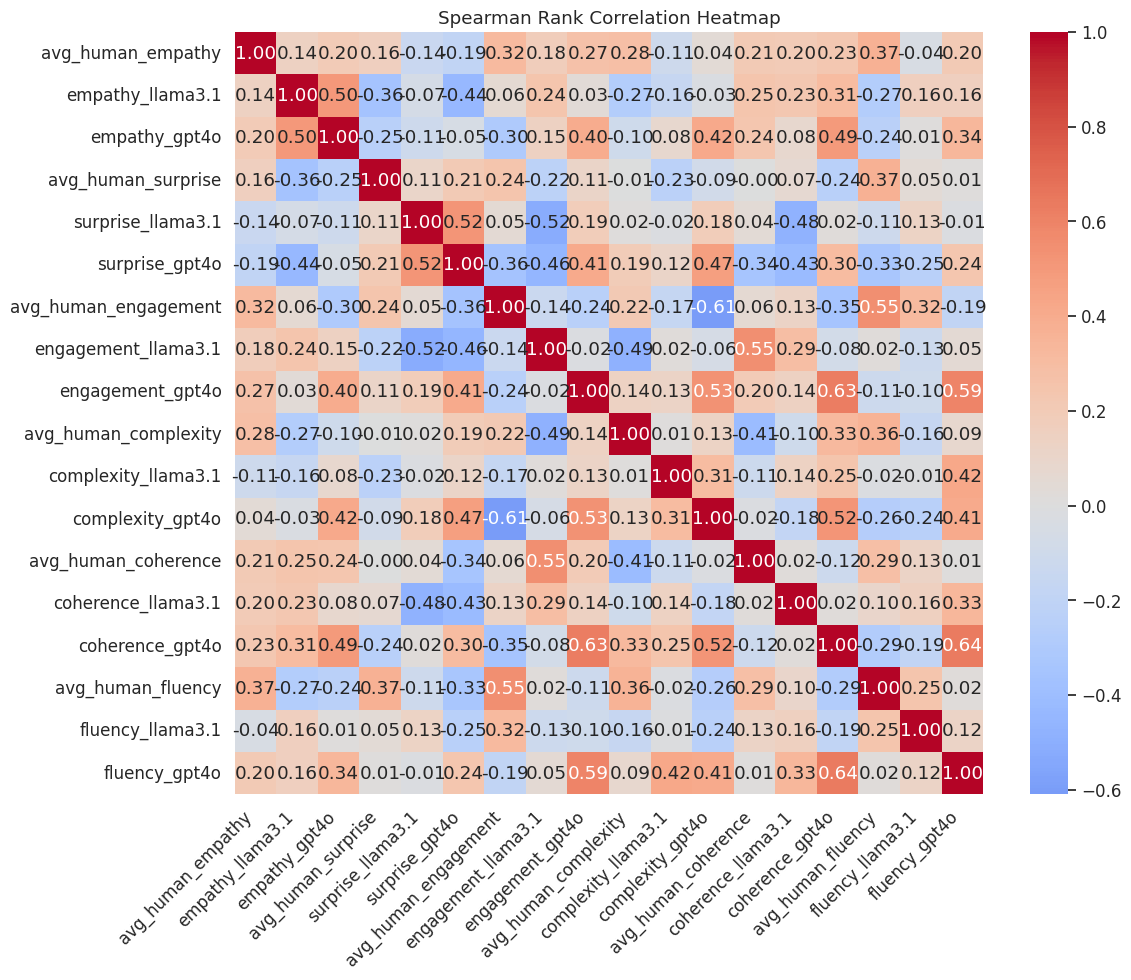

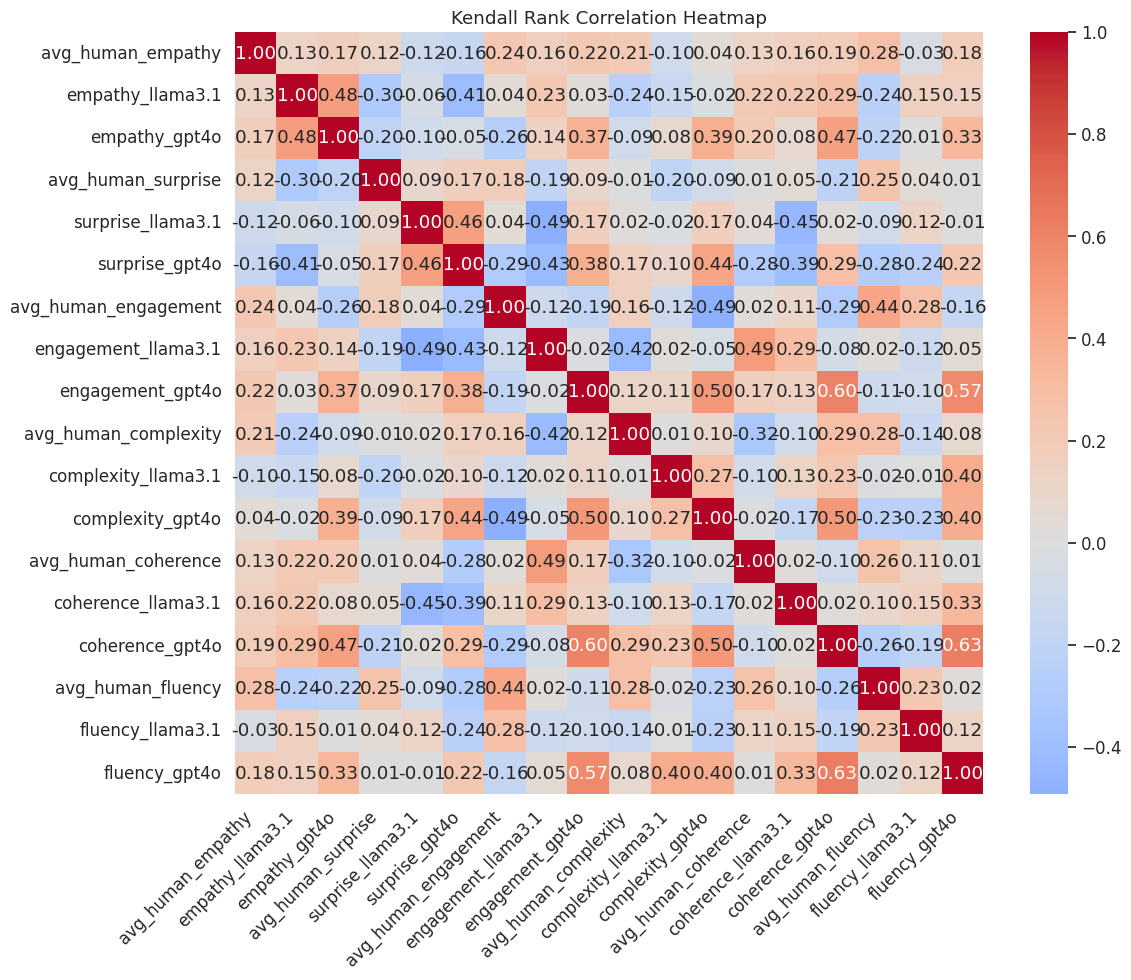

In [102]:


# Compute correlation matrices
spearman_corr = model_corr_data.corr(method='spearman')
kendall_corr = model_corr_data.corr(method='kendall')

# Spearman heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Spearman Rank Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Kendall heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Kendall Rank Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


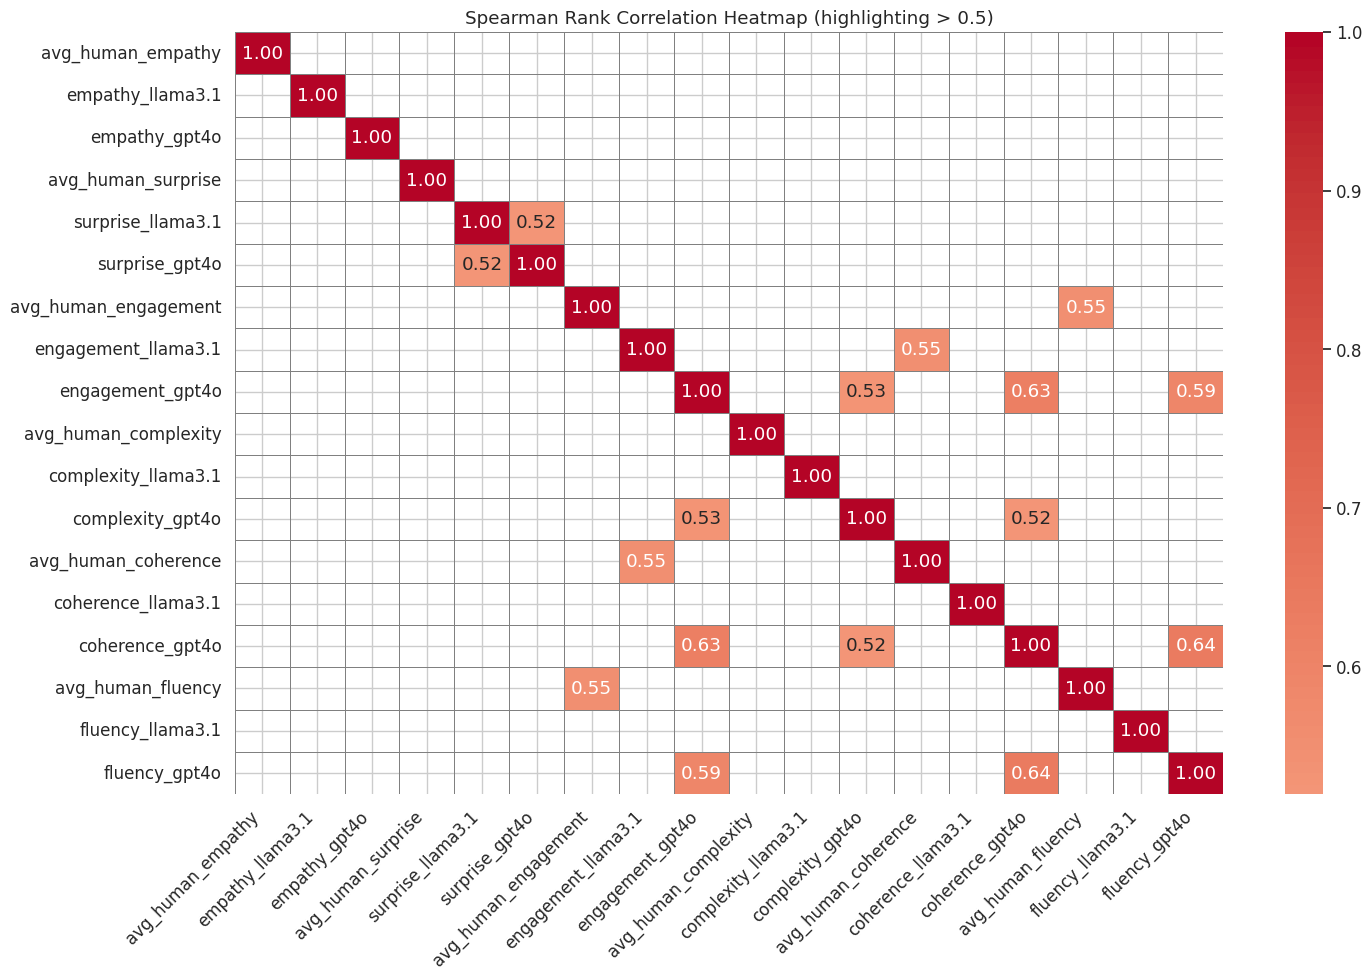

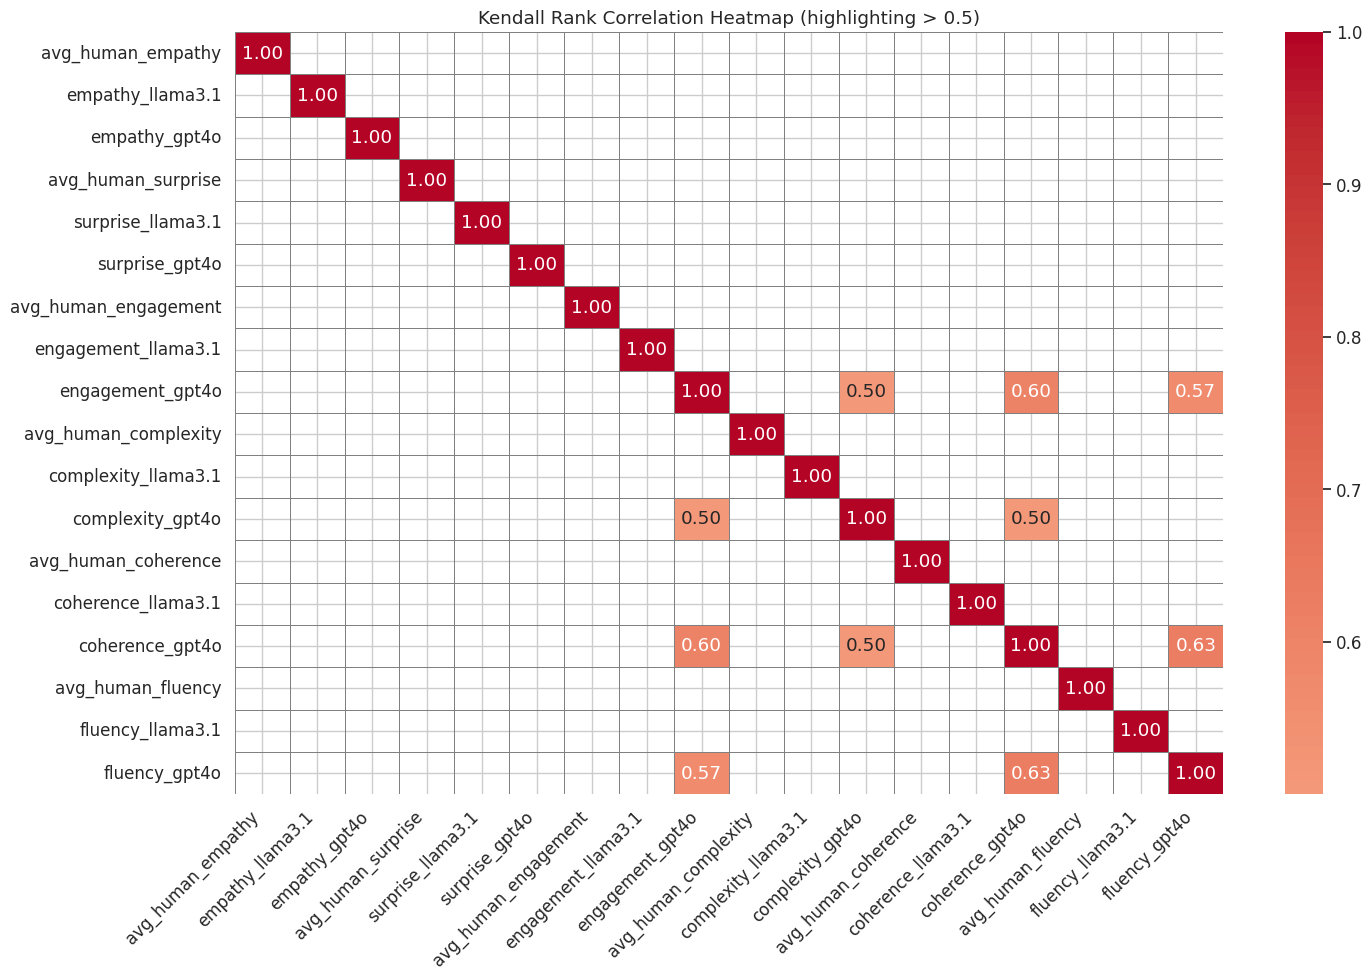

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to mask values ≤ 0.5
def highlight_heatmap(corr_matrix, method_name):
    mask = corr_matrix <= 0.5  # mask low correlations

    plt.figure(figsize=(15, 10))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        center=0,
        mask=mask,
        linewidths=0.5,
        linecolor='gray'
    )
    plt.title(f"{method_name} Rank Correlation Heatmap (highlighting > 0.5)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Apply to both matrices
highlight_heatmap(spearman_corr, "Spearman")
highlight_heatmap(kendall_corr, "Kendall")


In [105]:

# List of dimensions
dimensions = ['empathy', 'surprise', 'engagement', 'complexity', 'coherence', 'fluency']

# Radar plot function for a given story index
def radar_plot(story_idx):
    labels = dimensions
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]  # close the circle

    # Collect values
    avg_human = [df[f'avg_human_{dim}'].iloc[story_idx] for dim in dimensions]
    llama = [df[f'{dim}_llama3.1'].iloc[story_idx] for dim in dimensions]
    gpt = [df[f'{dim}_gpt4o'].iloc[story_idx] for dim in dimensions]

    # Close the loop
    avg_human += avg_human[:1]
    llama += llama[:1]
    gpt += gpt[:1]

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, avg_human, label='Avg Human', marker='o')
    ax.plot(angles, llama, label='LLaMA 3.1', marker='o')
    ax.plot(angles, gpt, label='GPT-4o', marker='o')

    ax.fill(angles, avg_human, alpha=0.1)
    ax.fill(angles, llama, alpha=0.1)
    ax.fill(angles, gpt, alpha=0.1)

    ax.set_title(f'Radar Chart for Story {story_idx} — ID: {df["story_id"].iloc[story_idx]}')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticklabels([])
    ax.legend(loc='upper right')
    plt.show()


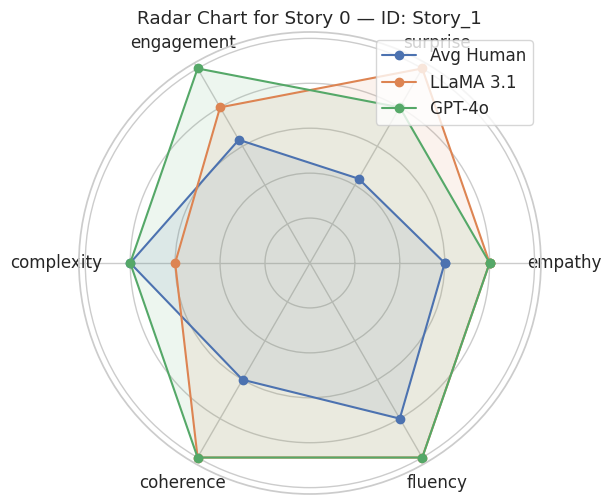

In [106]:
radar_plot(0)  # try with 0, 1, 2... up to 24


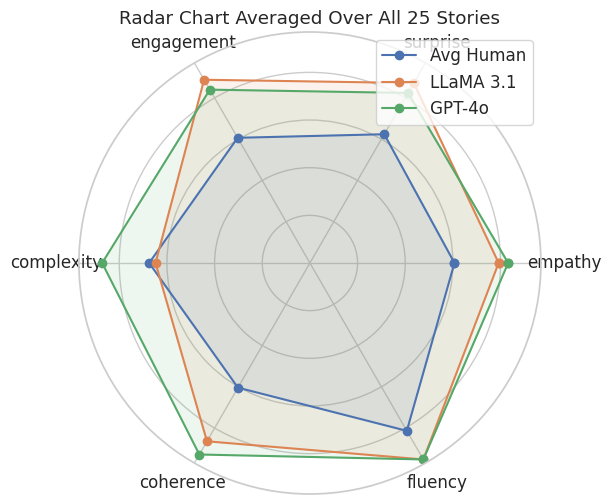

In [107]:
def radar_plot_avg_all_stories():
    labels = dimensions
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    avg_human = [df[f'avg_human_{dim}'].mean() for dim in dimensions]
    llama = [df[f'{dim}_llama3.1'].mean() for dim in dimensions]
    gpt = [df[f'{dim}_gpt4o'].mean() for dim in dimensions]

    avg_human += avg_human[:1]
    llama += llama[:1]
    gpt += gpt[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, avg_human, label='Avg Human', marker='o')
    ax.plot(angles, llama, label='LLaMA 3.1', marker='o')
    ax.plot(angles, gpt, label='GPT-4o', marker='o')

    ax.fill(angles, avg_human, alpha=0.1)
    ax.fill(angles, llama, alpha=0.1)
    ax.fill(angles, gpt, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticklabels([])
    ax.set_title("Radar Chart Averaged Over All 25 Stories")
    ax.legend(loc='upper right')
    plt.show()

radar_plot_avg_all_stories()


## Disagreement b/w reviewers on Empathy metrics

In [108]:
for dim in dimensions:
    df[f'{dim}_disagreement'] = df[[f'{r}_{dim}_human' for r in ['aditya', 'kole', 'dev']]].std(axis=1)


In [110]:
df[['story_id', 'story', 'empathy_disagreement']].sort_values(by='empathy_disagreement', ascending=False).head()


,story_id,story,empathy_disagreement
3,Story_4,Henry puffed on his pipe as he sat behind the ...,1.000000
2,Story_3,Granny Clara Jenkins adjusted her shades and w...,0.866025
15,Story_16,Noah rubbed the sleep from his eyes as he trud...,0.763763
19,Story_20,"Henry stood before the crumbling lighthouse, h...",0.763763
7,Story_8,The ocean's tide washed over the weathered roc...,0.577350


In [111]:
disagree_cols = [f'{dim}_disagreement' for dim in dimensions]
df_disagree_summary = df[['story_id', 'story'] + disagree_cols]


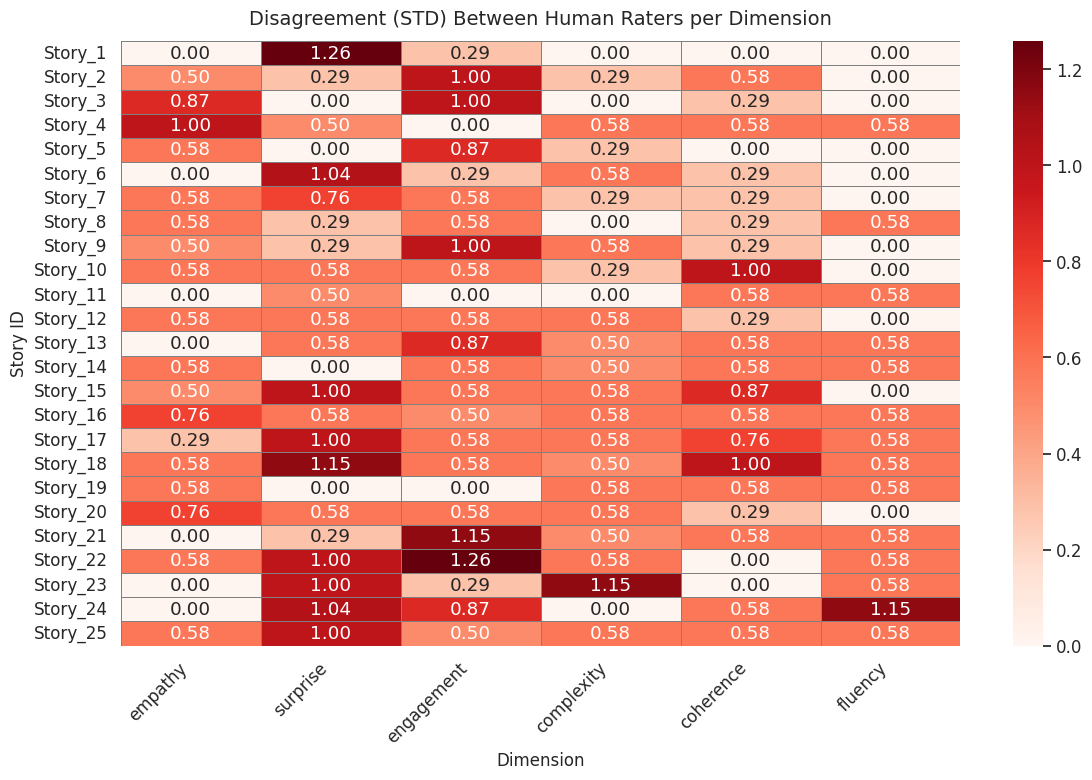

In [ ]:


# Set larger figure size *before* plotting
plt.figure(figsize=(12, 8))

# Plot heatmap
ax = sns.heatmap(
    df[disagree_cols],
    annot=True,
    fmt=".2f",
    cmap="Reds",
    cbar=True,
    xticklabels=dimensions,
    yticklabels=df["story_id"],  # Show story IDs on y-axis
    linewidths=0.5,
    linecolor='gray'
)

# Axis labels and title
ax.set_title("Disagreement (STD) Between Human Raters per Dimension", fontsize=14, pad=12)
ax.set_xlabel("Dimension", fontsize=12)
ax.set_ylabel("Story ID", fontsize=12)

# Tidy layout and rotation
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


| Story ID | High-Disagreement Dimensions (> 1.0 STD) |
| -------- | ---------------------------------------- |
| Story 1  | Surprise (1.26)                          |
| Story 18 | Surprise (1.15), Coherence (1.00)        |
| Story 22 | Engagement (1.26), Surprise (1.00)       |
| Story 23 | Coherence (1.15), Surprise (1.00)        |
| Story 24 | Fluency (1.15), Surprise (1.04)          |


| Dimension  | Avg. Disagreement (Approx.) | Notes                                             |
| ---------- | --------------------------- | ------------------------------------------------- |
| Surprise   | High (\~0.75+)              | Highly subjective, often divergent                |
| Engagement | High                        | Involves emotional interpretation                 |
| Complexity | Moderate                    | Some variation, but more structured               |
| Coherence  | Low-Moderate                | Often more objective                              |
| Empathy    | Low                         | Some consistency, few outliers                    |
| Fluency    | Very Low                    | High agreement, likely due to clear grammar rules |


High Disagreement Dimensions
Surprise and Engagement show the highest average disagreement among human raters.

Several stories reach or exceed 1.0 STD in these dimensions, suggesting that perceptions of surprise and engagement vary more subjectively between raters.

 Examples:

Story 1: Surprise STD = 1.26

Story 22: Surprise STD = 1.00, Engagement = 1.26

Story 23: Coherence = 1.15

Story 18: Surprise = 1.15, Coherence = 1.00

2. Low Disagreement Dimensions
Fluency, Empathy, and Coherence tend to have lower disagreement overall.

Many stories show perfect agreement (STD = 0.00) across these dimensions.

 Examples:

Story 1: Empathy, Coherence, Fluency = 0.00

Story 5: Fluency = 0.00

Story 11: Empathy = 0.00, Engagement = 0.00

Story 19: Surprise, Engagement, Fluency = 0.00

This suggests that human raters tend to be more aligned on objective dimensions like fluency and coherence, and less aligned on affective or interpretive dimensions like surprise or engagement.